# Анализ распределения заказов по времени  
## Описание  
Отгрузка маркетплейсу от интернет-магазина происходит 1 раз в день в 7:00. При этом последний заказ со сроком 2 дня доставки покупатель может сделать только до 7:00 текущего дня,после чего все остальные заказы будут видны покупателям со сроком 3 дня.    Компания хочет оптимизировать настройки в личном кабинете, для этого нужно понимать в какое время ей необходимо производить отгрузку и на какое время установить "отсечку".  
  
Задача - Провести исследотвательский анализ времени заказов.  
Цель - сократить срок доставки за счет правильного времени отгрузки.  
  
Доступны данные из личного кабинета маркетплейса по заказам за период 3 месяца.  

**План работы**:  
 - Загрузить и подготовить данные для анализа
 - Построить графики среднего кол-ва заказов
 - Сделать выводы и рекомендации.

## Загрузка датафрейа и предобработка  
Загружаем скачанный файл из ЛК маркетплейса

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving orders (7).csv to orders (7) (1).csv


### Импорт библиотек  
Импортируем нужные библиотеки

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



### Предобработка данных  
Для начала создадим датафрейм, и поменяем тип данных колонки с датой и временем заказов на datetime

In [ ]:
df = pd.read_csv('orders (7).csv',sep=';')
df['Принят в обработку'] = pd.to_datetime(df['Принят в обработку'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Номер заказа               3555 non-null   object        
 1   Номер отправления          3555 non-null   object        
 2   Принят в обработку         3555 non-null   datetime64[ns]
 3   Дата отгрузки              3555 non-null   object        
 4   Статус                     3555 non-null   object        
 5   Сумма отправления          3555 non-null   float64       
 6   Код валюты отправления     3555 non-null   object        
 7   Наименование товара        3555 non-null   object        
 8   OZON id                    3555 non-null   int64         
 9   Артикул                    3555 non-null   object        
 10  Итоговая стоимость товара  3555 non-null   float64       
 11  Код валюты товара          3555 non-null   object        
 12  Количе

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,Артикул,...,Имя покупателя,Телефон покупателя,Email покупателя,Имя получателя,Телефон получателя,Адрес доставки,Индекс,Склад отгрузки,Перевозчик,Название метода
0,79213527-0028,79213527-0028-1,2022-09-09 13:18:52,2022-09-10 11:00:00,Ожидает сборки,944.0,RUB,Пенная раскоксовка двигателя COMPLEX LAVR 400 ...,171856675,LN2510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск"
1,48243207-0245,48243207-0245-2,2022-09-09 12:57:26,2022-09-10 11:00:00,Ожидает сборки,389.0,RUB,"TSN 97880 Фильтр салона Фольксваген Поло, Поло...",167941303,97880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск"
2,75386884-0014,75386884-0014-1,2022-09-09 12:11:18,2022-09-12 11:00:00,Ожидает сборки,944.0,RUB,Пенная раскоксовка двигателя COMPLEX LAVR 400 ...,171856675,LN2510,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск"
3,24866044-0041,24866044-0041-3,2022-09-09 12:07:29,2022-09-10 11:00:00,Ожидает сборки,320.0,RUB,TSN Фильтр салона пылевой Хендай Солярис для а...,167869050,9737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск"
4,34942093-0036,34942093-0036-2,2022-09-09 12:04:14,2022-09-10 11:00:00,Ожидает сборки,433.0,RUB,LAVR (ПолихимАэро) Ln1750 Пенный очиститель ко...,172379757,LN1750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск"


Теперь добавим еще две колонки для анализа:  
1) Содержащую время суток в которое был сделан заказа(в разрезе одного часа)  
2) Содержащую день недели в который был сделан заказ.

In [ ]:
df['Hour'] = df['Принят в обработку'].dt.hour
df['weekday'] = df['Принят в обработку'].dt.weekday
df.head()

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,Артикул,...,Email покупателя,Имя получателя,Телефон получателя,Адрес доставки,Индекс,Склад отгрузки,Перевозчик,Название метода,Hour,weekday
0,79213527-0028,79213527-0028-1,2022-09-09 13:18:52,2022-09-10 11:00:00,Ожидает сборки,944.0,RUB,Пенная раскоксовка двигателя COMPLEX LAVR 400 ...,171856675,LN2510,...,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск",13,4
1,48243207-0245,48243207-0245-2,2022-09-09 12:57:26,2022-09-10 11:00:00,Ожидает сборки,389.0,RUB,"TSN 97880 Фильтр салона Фольксваген Поло, Поло...",167941303,97880,...,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск",12,4
2,75386884-0014,75386884-0014-1,2022-09-09 12:11:18,2022-09-12 11:00:00,Ожидает сборки,944.0,RUB,Пенная раскоксовка двигателя COMPLEX LAVR 400 ...,171856675,LN2510,...,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск",12,4
3,24866044-0041,24866044-0041-3,2022-09-09 12:07:29,2022-09-10 11:00:00,Ожидает сборки,320.0,RUB,TSN Фильтр салона пылевой Хендай Солярис для а...,167869050,9737,...,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск",12,4
4,34942093-0036,34942093-0036-2,2022-09-09 12:04:14,2022-09-10 11:00:00,Ожидает сборки,433.0,RUB,LAVR (ПолихимАэро) Ln1750 Пенный очиститель ко...,172379757,LN1750,...,NaN,NaN,NaN,NaN,NaN,Подольск,Ozon Rocket,"Ozon Rocket самостоятельно, Подольск",12,4


## Построение графиков  
Рассмотрим графики распределения заказов по времени как в общем за 3 месяца, так и отдельно по дням недели. Для этого создадим для каждого дня сводную таблицу, со средним количеством заказов в разрезе каждого часа. Тоже самое сделаем в общем для всего периода. После чего построим графики.

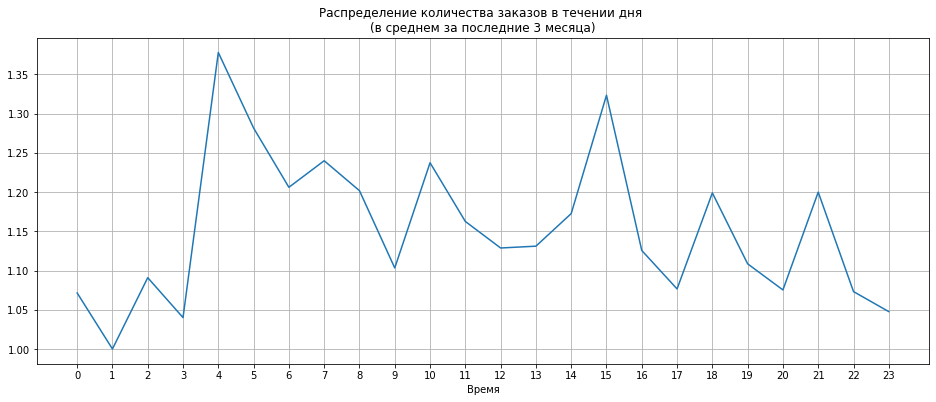

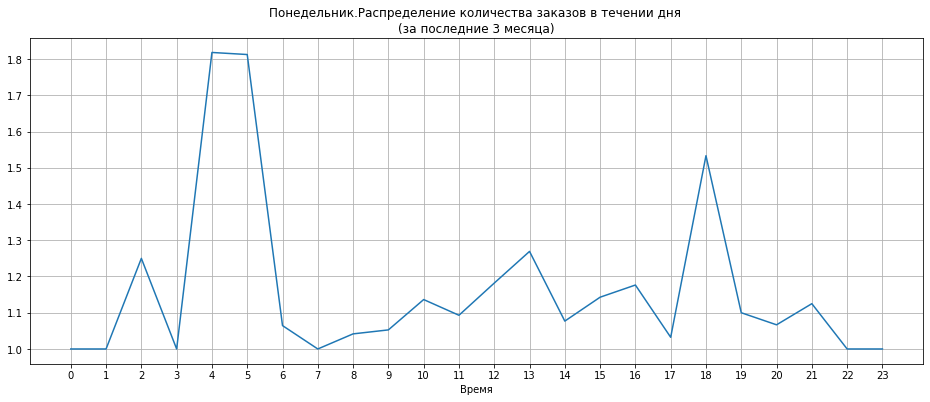

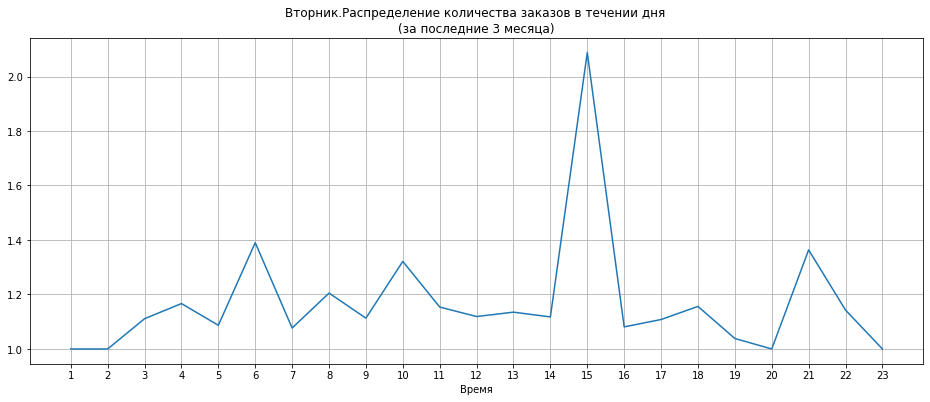

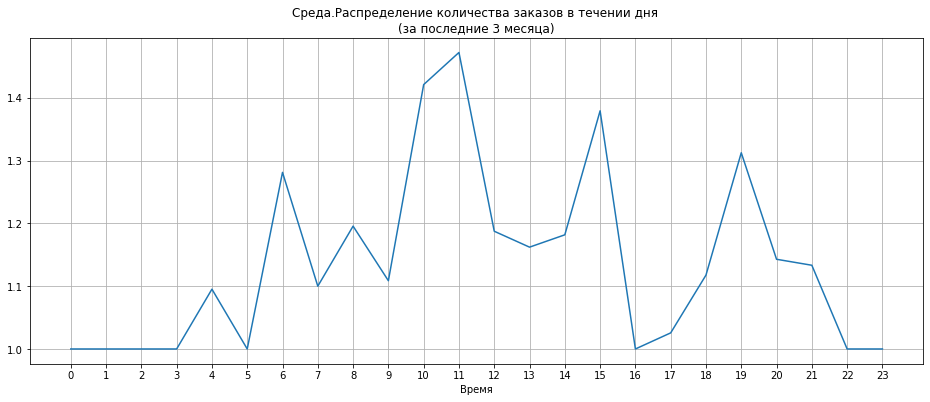

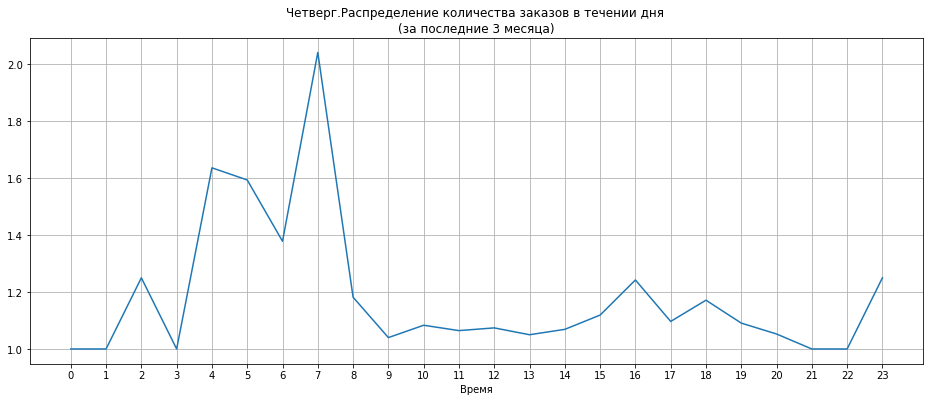

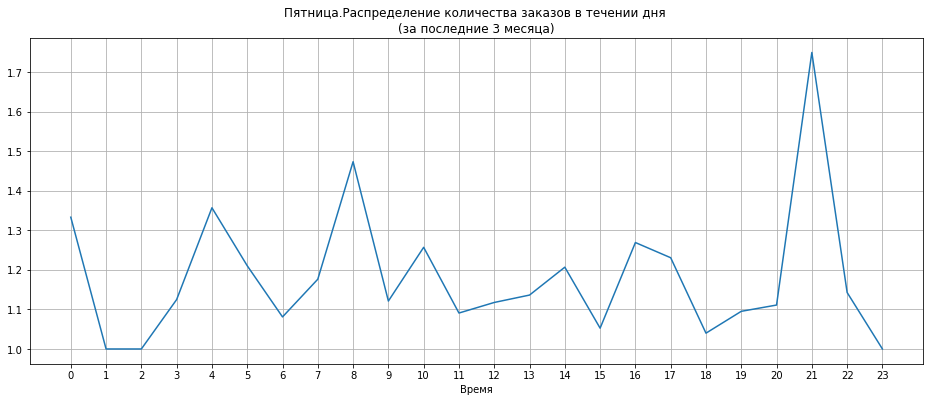

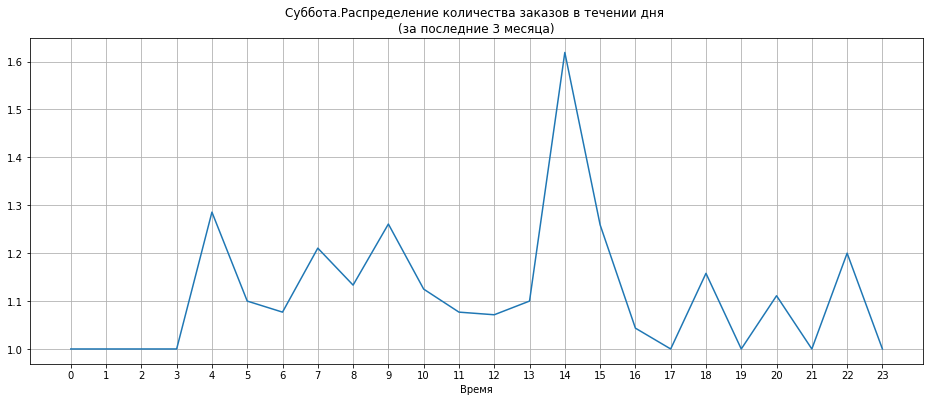

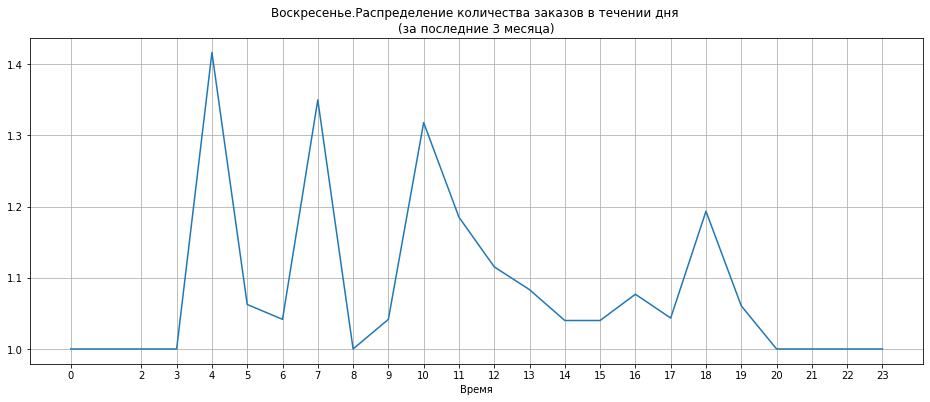

In [ ]:
# Создаем сводные таблицы объединяя количество заказов в разрезе каждого часа.
data_all = df.pivot_table(index='Hour', values='Количество', aggfunc=['mean'])
data_PN = df[df['weekday'] == 0].pivot_table(index='Hour', values='Количество', aggfunc=['mean'])
data_VT = df[df['weekday'] == 1].pivot_table(index='Hour', values='Количество', aggfunc=['mean'])
data_SR = df[df['weekday'] == 2].pivot_table(index='Hour', values='Количество', aggfunc=['mean'])
data_CH = df[df['weekday'] == 3].pivot_table(index='Hour', values='Количество', aggfunc=['mean'])
data_PT = df[df['weekday'] == 4].pivot_table(index='Hour', values='Количество', aggfunc=['mean'])
data_SB = df[df['weekday'] == 5].pivot_table(index='Hour', values='Количество', aggfunc=['mean'])
data_VS = df[df['weekday'] == 6].pivot_table(index='Hour', values='Количество', aggfunc=['mean'])



# Строим графики распределения количества заказов для каждой таблицы
data_all.plot(kind='line',figsize=(16,6),grid=True,xticks=(data_all.index),title='Распределение количества заказов в течении дня \n(в среднем за последние 3 месяца)',xlabel='Время', legend=False);
plt.show()
data_PN.plot(kind='line',figsize=(16,6),grid=True,xticks=(data_PN.index),title='Понедельник.Распределение количества заказов в течении дня \n(за последние 3 месяца)',xlabel='Время', legend=False);
plt.show()
data_VT.plot(kind='line',figsize=(16,6),grid=True,xticks=(data_VT.index),title='Вторник.Распределение количества заказов в течении дня \n(за последние 3 месяца)',xlabel='Время', legend=False);
plt.show()
data_SR.plot(kind='line',figsize=(16,6),grid=True,xticks=(data_SR.index),title='Среда.Распределение количества заказов в течении дня \n(за последние 3 месяца)',xlabel='Время', legend=False);
plt.show()
data_CH.plot(kind='line',figsize=(16,6),grid=True,xticks=(data_CH.index),title='Четверг.Распределение количества заказов в течении дня \n(за последние 3 месяца)',xlabel='Время', legend=False);
plt.show()
data_PT.plot(kind='line',figsize=(16,6),grid=True,xticks=(data_PT.index),title='Пятница.Распределение количества заказов в течении дня \n(за последние 3 месяца)',xlabel='Время', legend=False);
plt.show()
data_SB.plot(kind='line',figsize=(16,6),grid=True,xticks=(data_SB.index),title='Суббота.Распределение количества заказов в течении дня \n(за последние 3 месяца)',xlabel='Время', legend=False);
plt.show()
data_VS.plot(kind='line',figsize=(16,6),grid=True,xticks=(data_VS.index),title='Воскресенье.Распределение количества заказов в течении дня \n(за последние 3 месяца)',xlabel='Время', legend=False);
plt.show()



По графикам видно, что заказы поступают скачкообразно в течении всего дня. Тем не менее мы можем увидеть чот период с 22:00 до 4:00 наиболее "тихий период". При это м к 21:00 большинство покупателей уже оформили свои заказы.

## Выводы и рекомендации:  
   
Исходя из анализа данных с 4:00 по 21:00 большинство покупателей оформляют свои заказы, с пиками в период с 4:00 до 7:00 и с 14:00 до 15:00, соответствено необходим чтобы в эти промежутки времени покупатели видели минимальный срок доставки. При этом важно понимать сколько времени у магазина уходит на упаковку заказов, и в какое время есть возможность произвести отгрузку товара.  
По условиям магазина машина уезжает со склада в 7:00 и везет заказы прошлого дня, и именно поэтому "отсечка" по сроку доставки стоит в этом время.  


**Рекомендация**  
Поскольку для заказчика было важным чтобы упаковка заказов осуществлялась в дневное время, а изменить время отгрузки не представляется возможным, но можно отергулировать "отсечку", то наиболее оптимальным решением будет перенести отсечку на 21:00. Тогда все заказы полученные до 21:00 будут со сроком 2 дня, а небольшое количество заказов, которые придут с 21:00 до 00:00 будут со сроком 3 дня.  

Таким образом для большинства покупателей магазина(которые оформляли после 7:00) удастся уменьшить срок доставки на 1 день, что несомненно увеличит объем заказов. При достижении объема заказов на отдельную машину рекомендуется перейти на отгрузку в день заказа и установить "отсечку" на 19:00, а отгрузку на 20:00, таким образом для покупателей, которые оформляют заказы до 19:00 получится дополнительно сократить срок доставки еще на 1 день.